In [1]:
import numpy as np
import pickle
np.random.seed(7)  # for reproducibility


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2


Using TensorFlow backend.


In [3]:
import keras
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('tf')

In [4]:
import matplotlib.pyplot as plt
import os
import numpy

In [5]:
def unpickle(file):
    with open(file,'rb') as fo:
        dict=pickle.load(fo, encoding='bytes')
    data=dict['data']
    data = data.reshape((-1, 32, 32, 3))
    labels=dict['label']
    return data, labels

In [6]:
def saveTest(your_predict_labels):
    f=open('testlabel.pickle','rb')
    labels=pickle.load(f)
    f.close()
  #here you must replace the labels that you have predicted for the test set:
    for i in range(len(labels)):
        labels[i]=your_predict_labels[i]
  #save the pickle file that you should upload:
    f=open('testlabel.pickle','wb')
    pickle.dump(labels,f)
    f.close()

In [7]:
X_train_label, Y_train_label =unpickle("trainset.pickle")
print(X_train_label.shape)

(9000, 32, 32, 3)


In [8]:
X_validation_label, Y_validation_label=unpickle("validset.pickle")

In [9]:
f=open('testset.pickle','rb')
dict=pickle.load(f)
f.close()
X_test_label=dict['data']
X_test_label = X_test_label.reshape((-1, 32, 32, 3))
X_test = X_test_label.astype('float32')

print(X_test_label.shape)

(3000, 32, 32, 3)


In [10]:
f=open('testlabel.pickle','rb')
Y_test_label=pickle.load(f)
f.close()
Y_test=np_utils.to_categorical(Y_test_label, 10)


In [11]:
X_train = X_train_label.astype('float32')
X_validation = X_validation_label.astype('float32')


Y_train = np_utils.to_categorical(Y_train_label, 10)
Y_validation = np_utils.to_categorical(Y_validation_label, 10)
print(X_train.shape)

(9000, 32, 32, 3)


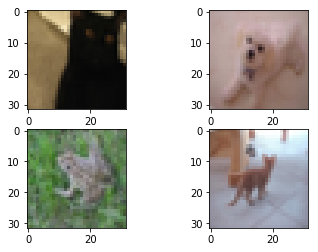

In [12]:
#image visualization
for i in range(4):
    img=X_train_label[i]
    img=img.reshape(-1,32,32).transpose([1,2,0])
    plt.subplot(2,2,i+1)
    plt.imshow(img)


In [13]:
# Parameter
num_classes = Y_train.shape[1]
batch_size = 64
epochs = 100
no_estimators = 5

In [16]:
# create CNN 9 conv layer & 3 Maxpooling layer 
def create_cnn_model():
    model = Sequential()
    model.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3), activation='relu', border_mode='same'))
    model.add(BatchNormalization())    
    model.add(Dropout(0.2))
    model.add(Convolution2D(32, 3, 3, activation='relu', border_mode='same'))

    model.add(BatchNormalization())
    model.add(Convolution2D(64, 3, 3, activation='relu', border_mode='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Convolution2D(64, 3, 3, activation='relu', border_mode='same'))
    model.add(BatchNormalization())
    model.add(Convolution2D(128, 3, 3, activation='relu', border_mode='same'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Convolution2D(128, 3, 3, activation='relu', border_mode='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    
    model.add(Convolution2D(256, 3, 3, activation='relu', border_mode='same'))
    model.add(BatchNormalization())
    model.add(Convolution2D(256, 3, 3, activation='relu', border_mode='same'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Convolution2D(512, 3, 3, activation='relu', border_mode='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    
    
    model.add(Flatten())
    
   
    model.add(Dropout(0.2))
    model.add(Dense(1024, activation='relu', W_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu', W_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    
    
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy',optimizer='Adam', metrics=['accuracy'])
    return model

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="same")`
  after removing the cwd from sys.path.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  import sys
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", padding="same")`
  app.launch_new_instance()
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update yo

Instructions for updating:
Use tf.cast instead.


C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 19s - loss: 14.2120 - acc: 0.4298 - val_loss: 4.8405 - val_acc: 0.4290
Epoch 2/100
 - 7s - loss: 2.5592 - acc: 0.5039 - val_loss: 1.8522 - val_acc: 0.5337
Epoch 3/100
 - 6s - loss: 1.4495 - acc: 0.5528 - val_loss: 1.2430 - val_acc: 0.5503
Epoch 4/100
 - 6s - loss: 1.2467 - acc: 0.5808 - val_loss: 1.2062 - val_acc: 0.5933
Epoch 5/100
 - 7s - loss: 1.1882 - acc: 0.6064 - val_loss: 1.3675 - val_acc: 0.5693
Epoch 6/100
 - 6s - loss: 1.0864 - acc: 0.6334 - val_loss: 1.1006 - val_acc: 0.6277
Epoch 7/100
 - 6s - loss: 1.0864 - acc: 0.6511 - val_loss: 1.1582 - val_acc: 0.5850
Epoch 8/100
 - 7s - loss: 1.0649 - acc: 0.6501 - val_loss: 1.0767 - val_acc: 0.6373
Epoch 9/100
 - 6s - loss: 0.9969 - acc: 0.6724 - val_loss: 1.0528 - val_acc: 0.6470
Epoch 10/100
 - 7s - loss: 0.9757 - acc: 0.6936 - val_loss: 1.1228 - val_acc: 0.6020
Epoch 11/100
 - 6s - loss: 0.9788 - acc: 0.7074 - val_loss: 1.1290 - val_acc: 0.6263
Epoch 12/100
 - 7s - los

Epoch 97/100
 - 6s - loss: 0.1897 - acc: 0.9863 - val_loss: 1.6252 - val_acc: 0.6920
Epoch 98/100
 - 6s - loss: 0.1861 - acc: 0.9888 - val_loss: 1.5614 - val_acc: 0.6880
Epoch 99/100
 - 6s - loss: 0.2048 - acc: 0.9833 - val_loss: 1.4264 - val_acc: 0.7010
Epoch 100/100
 - 6s - loss: 0.1896 - acc: 0.9868 - val_loss: 1.3753 - val_acc: 0.6810
3000/3000 [==============================] - 1s 256us/step

Test Accuracy: 0.7357


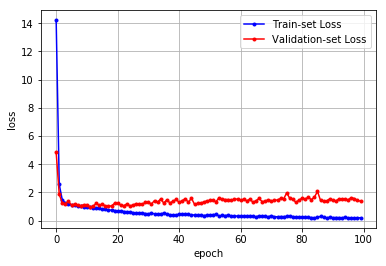

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 16s - loss: 14.1209 - acc: 0.4584 - val_loss: 4.3395 - val_acc: 0.5250
Epoch 2/100
 - 6s - loss: 2.5221 - acc: 0.5496 - val_loss: 1.5542 - val_acc: 0.5913
Epoch 3/100
 - 7s - loss: 1.4510 - acc: 0.5902 - val_loss: 1.2026 - val_acc: 0.6177
Epoch 4/100
 - 6s - loss: 1.2363 - acc: 0.6137 - val_loss: 1.2824 - val_acc: 0.6063
Epoch 5/100
 - 7s - loss: 1.1720 - acc: 0.6257 - val_loss: 1.3949 - val_acc: 0.5070
Epoch 6/100
 - 6s - loss: 1.1760 - acc: 0.6524 - val_loss: 1.1964 - val_acc: 0.5967
Epoch 7/100
 - 6s - loss: 1.1585 - acc: 0.6610 - val_loss: 1.1325 - val_acc: 0.6430
Epoch 8/100
 - 7s - loss: 1.1253 - acc: 0.6748 - val_loss: 1.1449 - val_acc: 0.6420
Epoch 9/100
 - 6s - loss: 1.0741 - acc: 0.6909 - val_loss: 1.0794 - val_acc: 0.6147
Epoch 10/100
 - 6s - loss: 1.0762 - acc: 0.6967 - val_loss: 1.1358 - val_acc: 0.6640
Epoch 11/100
 - 7s - loss: 1.0165 - acc: 0.7124 - val_loss: 1.1364 - val_acc: 0.6523
Epoch 12/100
 - 6s - los

Epoch 97/100
 - 7s - loss: 0.2514 - acc: 0.9827 - val_loss: 1.6960 - val_acc: 0.6923
Epoch 98/100
 - 6s - loss: 0.2385 - acc: 0.9832 - val_loss: 1.8342 - val_acc: 0.6613
Epoch 99/100
 - 6s - loss: 0.2117 - acc: 0.9862 - val_loss: 1.7493 - val_acc: 0.6877
Epoch 100/100
 - 6s - loss: 0.2123 - acc: 0.9857 - val_loss: 1.3856 - val_acc: 0.6913
3000/3000 [==============================] - 1s 280us/step

Test Accuracy: 0.7447


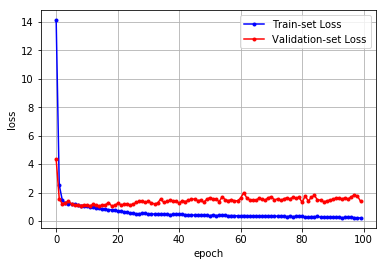

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 16s - loss: 14.5761 - acc: 0.4453 - val_loss: 4.4265 - val_acc: 0.5553
Epoch 2/100
 - 7s - loss: 2.6320 - acc: 0.5397 - val_loss: 1.6133 - val_acc: 0.5473
Epoch 3/100
 - 6s - loss: 1.4292 - acc: 0.5726 - val_loss: 1.3291 - val_acc: 0.5420
Epoch 4/100
 - 6s - loss: 1.2580 - acc: 0.6029 - val_loss: 1.4044 - val_acc: 0.5680
Epoch 5/100
 - 7s - loss: 1.2064 - acc: 0.6226 - val_loss: 1.5084 - val_acc: 0.5563
Epoch 6/100
 - 6s - loss: 1.1410 - acc: 0.6470 - val_loss: 1.1538 - val_acc: 0.5867
Epoch 7/100
 - 7s - loss: 1.1006 - acc: 0.6554 - val_loss: 1.0842 - val_acc: 0.6503
Epoch 8/100
 - 7s - loss: 1.0440 - acc: 0.6793 - val_loss: 1.0666 - val_acc: 0.6480
Epoch 9/100
 - 6s - loss: 1.0262 - acc: 0.6847 - val_loss: 1.0617 - val_acc: 0.6693
Epoch 10/100
 - 7s - loss: 1.0302 - acc: 0.6929 - val_loss: 1.0180 - val_acc: 0.6717
Epoch 11/100
 - 6s - loss: 0.9605 - acc: 0.7041 - val_loss: 1.0257 - val_acc: 0.6587
Epoch 12/100
 - 6s - los

Epoch 97/100
 - 7s - loss: 0.2604 - acc: 0.9823 - val_loss: 1.8828 - val_acc: 0.6863
Epoch 98/100
 - 6s - loss: 0.2293 - acc: 0.9870 - val_loss: 1.4551 - val_acc: 0.7030
Epoch 99/100
 - 7s - loss: 0.2476 - acc: 0.9864 - val_loss: 1.3703 - val_acc: 0.6943
Epoch 100/100
 - 7s - loss: 0.2173 - acc: 0.9859 - val_loss: 1.5154 - val_acc: 0.6873
3000/3000 [==============================] - 1s 269us/step

Test Accuracy: 0.7540


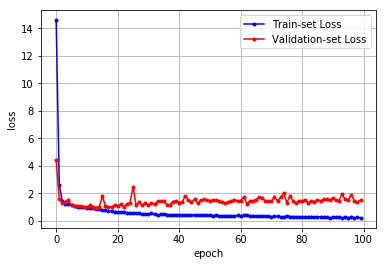

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 15s - loss: 14.0847 - acc: 0.4439 - val_loss: 4.9315 - val_acc: 0.4660
Epoch 2/100
 - 6s - loss: 2.4529 - acc: 0.5372 - val_loss: 1.6064 - val_acc: 0.5610
Epoch 3/100
 - 6s - loss: 1.4518 - acc: 0.5753 - val_loss: 1.3502 - val_acc: 0.5680
Epoch 4/100
 - 6s - loss: 1.2253 - acc: 0.6049 - val_loss: 1.1369 - val_acc: 0.6017
Epoch 5/100
 - 6s - loss: 1.1619 - acc: 0.6264 - val_loss: 1.1699 - val_acc: 0.6153
Epoch 6/100
 - 6s - loss: 1.1212 - acc: 0.6378 - val_loss: 1.0531 - val_acc: 0.6457
Epoch 7/100
 - 7s - loss: 1.1176 - acc: 0.6468 - val_loss: 1.1800 - val_acc: 0.6313
Epoch 8/100
 - 6s - loss: 1.1089 - acc: 0.6601 - val_loss: 1.1072 - val_acc: 0.6280
Epoch 9/100
 - 7s - loss: 1.0403 - acc: 0.6768 - val_loss: 1.1449 - val_acc: 0.6473
Epoch 10/100
 - 7s - loss: 1.0504 - acc: 0.6861 - val_loss: 1.1052 - val_acc: 0.6640
Epoch 11/100
 - 6s - loss: 0.9912 - acc: 0.7022 - val_loss: 1.2740 - val_acc: 0.5947
Epoch 12/100
 - 6s - los

Epoch 97/100
 - 7s - loss: 0.2190 - acc: 0.9878 - val_loss: 1.5973 - val_acc: 0.6737
Epoch 98/100
 - 7s - loss: 0.2242 - acc: 0.9832 - val_loss: 1.4138 - val_acc: 0.6970
Epoch 99/100
 - 7s - loss: 0.1879 - acc: 0.9871 - val_loss: 1.5197 - val_acc: 0.6870
Epoch 100/100
 - 6s - loss: 0.2103 - acc: 0.9856 - val_loss: 1.4508 - val_acc: 0.6853
3000/3000 [==============================] - 1s 217us/step

Test Accuracy: 0.7577


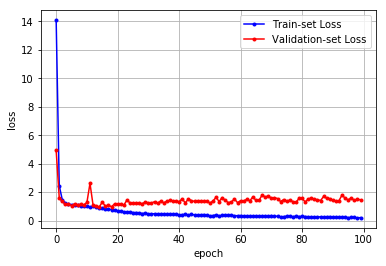

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 17s - loss: 14.0933 - acc: 0.4457 - val_loss: 4.2049 - val_acc: 0.5547
Epoch 2/100
 - 6s - loss: 2.4969 - acc: 0.5393 - val_loss: 2.1120 - val_acc: 0.5083
Epoch 3/100
 - 7s - loss: 1.3919 - acc: 0.5752 - val_loss: 1.3318 - val_acc: 0.5300
Epoch 4/100
 - 7s - loss: 1.2346 - acc: 0.6056 - val_loss: 1.2163 - val_acc: 0.5517
Epoch 5/100
 - 7s - loss: 1.1383 - acc: 0.6250 - val_loss: 1.0931 - val_acc: 0.6117
Epoch 6/100
 - 7s - loss: 1.1209 - acc: 0.6321 - val_loss: 1.0825 - val_acc: 0.6380
Epoch 7/100
 - 6s - loss: 1.0725 - acc: 0.6422 - val_loss: 1.0656 - val_acc: 0.6393
Epoch 8/100
 - 7s - loss: 1.0682 - acc: 0.6576 - val_loss: 1.1923 - val_acc: 0.6070
Epoch 9/100
 - 7s - loss: 1.0249 - acc: 0.6830 - val_loss: 1.0654 - val_acc: 0.5960
Epoch 10/100
 - 7s - loss: 1.0066 - acc: 0.6931 - val_loss: 1.3828 - val_acc: 0.5970
Epoch 11/100
 - 7s - loss: 0.9671 - acc: 0.7062 - val_loss: 1.0927 - val_acc: 0.6603
Epoch 12/100
 - 7s - los

Epoch 97/100
 - 7s - loss: 0.1977 - acc: 0.9849 - val_loss: 1.6086 - val_acc: 0.6777
Epoch 98/100
 - 7s - loss: 0.1956 - acc: 0.9844 - val_loss: 1.5240 - val_acc: 0.6807
Epoch 99/100
 - 7s - loss: 0.2125 - acc: 0.9854 - val_loss: 1.2535 - val_acc: 0.6997
Epoch 100/100
 - 7s - loss: 0.1816 - acc: 0.9881 - val_loss: 2.0857 - val_acc: 0.6843
3000/3000 [==============================] - 1s 239us/step

Test Accuracy: 0.7807


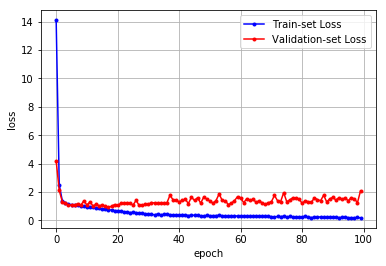

In [17]:
## ENSEMBLE MODELS
# Train many CNN models
for i in np.arange(no_estimators):
    # check point to save best model
    checkpoint = keras.callbacks.ModelCheckpoint('models_10/model_'+str(i)+'.h5', monitor='val_acc', \
            verbose=0, save_best_only=True, save_weights_only=True, mode='auto')
    # clear GPU memory
    model = None
    K.clear_session()
    
    # train model
    model = create_cnn_model()
    history=model.fit(X_train, Y_train, validation_data=(X_validation, Y_validation), nb_epoch=100, \
                batch_size=64, verbose=2, callbacks=[checkpoint])
    print("\nTest Accuracy: {:.4f}".format(model.evaluate(X_test, Y_test)[1]))
    y_vloss=history.history['val_loss']
    y_loss=history.history['loss']
    
    x_len=numpy.arange(len(y_loss))
    plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
    plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
    
    plt.legend(loc='upper right')
    plt.grid()
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

In [19]:
# Check individual scores - val_acc and get list of the best models
score_list = []
score_list2 = []
score_list3=[]
model = create_cnn_model()
for i in np.arange(no_estimators):    
    model.load_weights('models_10/model_'+str(i)+'.h5')
    scores3= model.evaluate(X_test, Y_test, verbose=0)
    scores2= model.evaluate(X_train, Y_train, verbose=0)
    scores = model.evaluate(X_validation, Y_validation, verbose=0)
    score_list.append(scores[1])   #validation Acc
    score_list2.append(scores2[1])    #Train Acc
    score_list3.append(scores3[1])  #Test Acc
score_list = np.array(score_list)
score_list2= np.array(score_list2)
score_list3= np.array(score_list3)
score_list_filter = score_list >= 0.70 # threshold to select best model
print("Train Acc: "+str(score_list2))
print("Validation Acc: "+ str(score_list))
print("Test Acc: "+ str(score_list3))

print(score_list_filter)

C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="same")`
  after removing the cwd from sys.path.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  import sys
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_l

Train Acc: [0.99666667 0.99855556 0.99233333 0.99877778 0.97611111]
Validation Acc: [0.705      0.70633333 0.70733333 0.71033333 0.705     ]
Test Acc: [0.765      0.76266667 0.766      0.779      0.771     ]
[ True  True  True  True  True]


In [20]:
# Ensemble predictions ~ val_err 16%
predictions = np.zeros((Y_validation.shape[0],Y_validation.shape[1]))
predictions_test=np.zeros((Y_test.shape[0],Y_test.shape[1]))
model = create_cnn_model()
for i in np.arange(no_estimators): 
    if score_list_filter[i] == False:
        continue
    #validation
    model.load_weights('models_10/model_'+str(i)+'.h5')
    prediction = model.predict_classes(X_validation, batch_size=200, verbose=0)
    prediction_onehot = np_utils.to_categorical(prediction, 10)
    predictions = predictions + prediction_onehot*score_list[i]
    #Test
    prediction_test = model.predict_classes(X_test, batch_size=200, verbose=0)
    prediction_onehot_test = np_utils.to_categorical(prediction_test, 10)
    predictions_test = predictions_test + prediction_onehot_test*score_list3[i]

predictions_label = np.argmax(predictions, axis=1)
evaluate = np.equal(predictions_label, Y_validation_label)

predictions_label_test = np.argmax(predictions_test, axis=1)
evaluate_test = np.equal(predictions_label_test, Y_test_label)

print("Ensemble Validation_Error: %.2f%%" % (100-np.mean(evaluate)*100))
print("Ensemble Validation_Accuracy: %.2f%%" % (np.mean(evaluate)*100))

print("Ensemble Test_Error: %.2f%%" % (100-np.mean(evaluate_test)*100))
print("Ensemble Test_Accuracy: %.2f%%" % (np.mean(evaluate_test)*100))

C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="same")`
  after removing the cwd from sys.path.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  import sys
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_l

Ensemble Validation_Error: 25.50%
Ensemble Validation_Accuracy: 74.50%
Ensemble Test_Error: 17.00%
Ensemble Test_Accuracy: 83.00%


In [ ]:
## PERFORM PREDICTION ON TEST SET

X_test = X_test_label.astype('float32')

predictions = np.zeros((Y_validation.shape[0],Y_validation.shape[1]))
model = create_cnn_model()
for i in np.arange(no_estimators): 
    if score_list_filter[i] == False: # skip bad model
        continue
    model.load_weights('models_10/model_'+str(i)+'.h5')
    prediction = model.predict_classes(X_test, batch_size=200, verbose=0)
    prediction_onehot = np_utils.to_categorical(prediction, 10)
    predictions = predictions + prediction_onehot*score_list[i]

predictions_label = np.argmax(predictions, axis=1)
output = predictions_label.tolist()

with open('testlabel.pickle','wb') as f:
    pickle.dump(output, f)

pred = model.evaluate(X_test, Y_test)
print("test loss: ",pred[0]+"test acc: ",pred[1])